# Forelesning 7: Differensiallikninger

$$y' = y + t$$

$$f'(t) = f(y, t)$$

Eulers metode utledes på tavla.

## Fra makronivå...

### Fallende ambolt

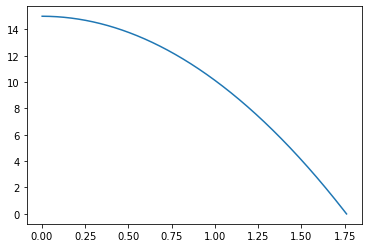

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# konstanter
g = 9.8 # tyngdeakselerasjon i m/s^2
m = 30  # masse i kg
k = 20  # luftmotstandstall

# startbetingelser
t = 0
v = 0
s = 15

# tidsparametre
dt = 1E-3
s_slutt = 0

# lister
posisjon = []
fart = []
akselerasjon = []
tid = []

while s >= s_slutt:
    F = -m*g - k*v/m # Kreftene som virker
    a = F/m          # Newtons 2. lov
    v = v + a*dt
    s = s + v*dt     #+ 0.5*a*dt**2
    t = t + dt
    # Legger verdier inn i listene
    posisjon.append(s)
    fart.append(v)
    akselerasjon.append(a)
    tid.append(t)

plt.plot(tid, posisjon)
plt.show()

__Oppgave:__ Gjør om programmet slik at det benytter arrayer istedenfor lister

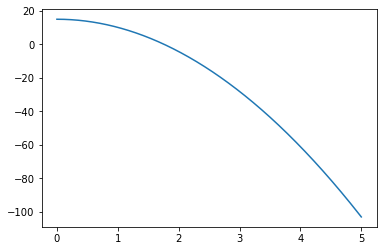

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# konstanter
g = 9.8 # tyngdeakselerasjon i m/s^2
m = 30  # masse i kg
k = 20  # luftmotstandstall

# startbetingelser
t0 = 0
v0 = 0
s0 = 15

# tidsparametre
tid_slutt = 5 # sekunder
dt = 1E-3
N = int(tid_slutt/dt) + 1 # antall punkter

# arrayer
t = np.zeros(N)
s = np.zeros(N)
v = np.zeros(N)
a = np.zeros(N)

t[0] = t0
s[0] = s0
v[0] = v0

for i in range(N-1):
    F = -m*g - k*v[i]/m # Kreftene som virker
    a[i] = F/m          # Newtons 2. lov
    v[i+1] = v[i] + a[i]*dt
    s[i+1] = s[i] + v[i]*dt     #+ 0.5*a*dt**2
    t[i+1] = t[i] + dt

plt.plot(t,s)
plt.show()

## ...til mikronivå

### En bindingsmodell

Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_{eq})$$

der _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut.

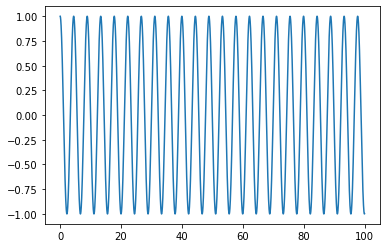

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# konstanter
g = 9.8 # tyngdeakselerasjon i m/s^2
m = 1   # masse
x_eq = 0
k = 2  # fjærkrafttallet

# startbetingelser
t0 = 0
v0 = 0
x0 = 1

# tidsparametre
tid_slutt = 100 # sekunder
dt = 1E-2
N = int(tid_slutt/dt) + 1 # antall punkter

# arrayer
t = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)

t[0] = t0
x[0] = x0
v[0] = v0

for i in range(N-1):
    F = -k*(x[i]-x_eq) # Kreftene som virker
    a = F/m          # Newtons 2. lov
    v[i+1] = v[i] + a*dt     # Eulers metode
    x[i+1] = x[i] + v[i+1]*dt     # Eulers metode
    t[i+1] = t[i] + dt

plt.plot(t,x)
plt.show()

In [10]:
from vpython import *

# Create a scene
scene = canvas(title='Chemical Bond Vibration')

# Create atoms (represented as spheres)
atom1 = sphere(pos=vector(-1,0,0), radius=0.2, color=color.red)
atom2 = sphere(pos=vector(1,0,0), radius=0.2, color=color.blue)

# Create a bond (represented as a cylinder)
bond = cylinder(pos=atom1.pos, axis=atom2.pos-atom1.pos, radius=0.05, color=color.white)

g = 9.8 # tyngdeakselerasjon i m/s^2
m = 1   # masse
x_eq = 0
k = 2  # fjærkrafttallet

# startbetingelser
t0 = 0
v0 = 0
x0 = 1


# Constants and initial conditions
k = 0.2
m = 1
x0 = 0.5
v0 = -0.1
dt = 0.05

# Animation loop
while True:
    rate(100)  # Sets the speed of the animation
    F = -k * (atom2.pos.x - x0)
    a = F / m
    v = v0 + a * dt
    atom2.pos.x = atom2.pos.x + v * dt

    # Update bond length and direction
    bond.axis = atom2.pos - atom1.pos

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [5]:
!pip install --upgrade jinja2